#Problem Statement

#Importing necessary libraries

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import pickle
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder

#Loading the 2 datasets

In [ ]:
nifty_data = pd.read_csv('/content/nifty.csv')
nifty_data.head()

,datetime,open,high,low,close,volume,open interest
0,2024-12-10 00:00:00,24652.65,24677.80,24510.65,24610.05,0,0
1,2024-12-09 00:00:00,24633.90,24705.00,24580.05,24619.00,0,0
2,2024-12-06 00:00:00,24729.45,24751.05,24620.50,24677.80,0,0
3,2024-12-05 00:00:00,24539.15,24857.75,24295.55,24708.40,0,0
4,2024-12-04 00:00:00,24488.75,24573.20,24366.30,24467.45,0,0


In [ ]:
news_data = pd.read_csv('/content/finalfinancedata.csv')
news_data.head()

,title,link,snippet,date_range,date
0,"Financial Express Mumbai, Thu, 12 Dec 24",https://epaper.financialexpress.com/t/26733/la...,... Financial Express comes packed with incisi...,01/01/2019 to 01/31/2019,NaN
1,Reserve-bank-of-india News - Mint,https://www.livemint.com/topic/reserve-bank-of...,Reserve-bank-of-india News: Get the latest Res...,01/01/2019 to 01/31/2019,NaN
2,Budget years of Arun Jaitley Finance Minister,https://m.economictimes.com/budget/jaitleys-bu...,Arun Jaitley's five-year struggle to bring dow...,01/01/2019 to 01/31/2019,NaN
3,Indian lender DMI Finance raises $230m from Eu...,https://www.dmifinance.in/indian-lender-dmi-fi...,Non-banking financial company DMI Finance Pvt....,01/01/2019 to 01/31/2019,NaN
4,Khushboo Narayan,https://www.financialexpress.com/author/khushb...,"In an 18-page complaint, these investors have ...",01/01/2019 to 01/31/2019,NaN


In [ ]:
news_data.head()

,title,link,snippet,date_range,date
0,"Financial Express Mumbai, Thu, 12 Dec 24",https://epaper.financialexpress.com/t/26733/la...,... Financial Express comes packed with incisi...,01/01/2019 to 01/31/2019,NaN
1,Reserve-bank-of-india News - Mint,https://www.livemint.com/topic/reserve-bank-of...,Reserve-bank-of-india News: Get the latest Res...,01/01/2019 to 01/31/2019,NaN
2,Budget years of Arun Jaitley Finance Minister,https://m.economictimes.com/budget/jaitleys-bu...,Arun Jaitley's five-year struggle to bring dow...,01/01/2019 to 01/31/2019,NaN
3,Indian lender DMI Finance raises $230m from Eu...,https://www.dmifinance.in/indian-lender-dmi-fi...,Non-banking financial company DMI Finance Pvt....,01/01/2019 to 01/31/2019,NaN
4,Khushboo Narayan,https://www.financialexpress.com/author/khushb...,"In an 18-page complaint, these investors have ...",01/01/2019 to 01/31/2019,NaN


#Data Cleaning

##Nifty data

In [ ]:
nifty_data['datetime'] = pd.to_datetime(nifty_data['datetime'])
nifty_data = nifty_data.sort_values(by='datetime').drop_duplicates(subset='datetime').reset_index(drop=True)
nifty_data = nifty_data[(nifty_data['datetime'] >= '2019-01-01') & (nifty_data['datetime'] <= '2024-12-31')]
nifty_data['date'] = nifty_data['datetime'].dt.date

In [ ]:
nifty_data.head()

,datetime,open,high,low,close,volume,open interest,date
6891,2019-01-01,10881.70,10923.60,10807.10,10910.10,0,0,2019-01-01
6892,2019-01-02,10868.85,10895.35,10735.05,10792.50,0,0,2019-01-02
6893,2019-01-03,10796.80,10814.05,10661.25,10672.25,0,0,2019-01-03
6894,2019-01-04,10699.70,10741.05,10628.65,10727.35,0,0,2019-01-04
6895,2019-01-07,10804.85,10835.95,10750.15,10771.80,0,0,2019-01-07


## News data

##Extract date from datr range as it is missing

In [ ]:
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')

##Extract date from date range if it has NaN

In [ ]:
news_data.loc[news_data['date'].isna(), 'date'] = news_data['date_range'].str.split(' to ').str[0]

##Verifying any fill remanining NaN values using backfill

In [ ]:
news_data['date'] = news_data['date'].fillna(method='bfill').fillna(method='ffill')




<ipython-input-10-809006281ec9>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  news_data['date'] = news_data['date'].fillna(method='bfill').fillna(method='ffill')


In [ ]:
news_data.head()

,title,link,snippet,date_range,date
0,"Financial Express Mumbai, Thu, 12 Dec 24",https://epaper.financialexpress.com/t/26733/la...,... Financial Express comes packed with incisi...,01/01/2019 to 01/31/2019,2019-01-01
1,Reserve-bank-of-india News - Mint,https://www.livemint.com/topic/reserve-bank-of...,Reserve-bank-of-india News: Get the latest Res...,01/01/2019 to 01/31/2019,2019-01-01
2,Budget years of Arun Jaitley Finance Minister,https://m.economictimes.com/budget/jaitleys-bu...,Arun Jaitley's five-year struggle to bring dow...,01/01/2019 to 01/31/2019,2019-01-01
3,Indian lender DMI Finance raises $230m from Eu...,https://www.dmifinance.in/indian-lender-dmi-fi...,Non-banking financial company DMI Finance Pvt....,01/01/2019 to 01/31/2019,2019-01-01
4,Khushboo Narayan,https://www.financialexpress.com/author/khushb...,"In an 18-page complaint, these investors have ...",01/01/2019 to 01/31/2019,2019-01-01


### Handle missing values in 'usable_date'

In [ ]:
news_data['usable_date'] = news_data['date']


##Extract start date from date range if usable data aint available

In [ ]:
news_data['usable_date'] = news_data['usable_date'].fillna(news_data['date_range'].str.split(' to ').str[0])

##Convert usable date to datetime

In [ ]:
news_data['usable_date'] = pd.to_datetime(news_data['usable_date'], errors='coerce')

## Fill remaningi values with backfill/forward fill

In [ ]:
news_data['usable_date'] = news_data['usable_date'].fillna(method='bfill').fillna(method='ffill')

<ipython-input-15-5eb7ac7d4a5a>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  news_data['usable_date'] = news_data['usable_date'].fillna(method='bfill').fillna(method='ffill')


##Verify and drop rows when usable date is nan

In [ ]:
news_data = news_data.dropna(subset=['usable_date']).reset_index(drop=True)

##Ensure date in nifty data into datetime.date

In [ ]:
nifty_data['date'] = pd.to_datetime(nifty_data['date']).dt.date



##Ensure  usable date in news data into datetime.date

In [ ]:
news_data['usable_date'] = pd.to_datetime(news_data['usable_date'], errors='coerce').dt.date

In [ ]:
if 'snippet' in news_data.columns:
    news_data['snippet'] = news_data['snippet'].fillna('No snippet available')
else:
    print("Warning: 'snippet' column is missing in news_data. Defaulting all sentiments to 'Neutral'.")
    news_data['snippet'] = 'Neutral'

news_data['usable_date'] = pd.to_datetime(news_data['date'], errors='coerce')
news_data['usable_date'] = news_data['usable_date'].fillna(method='bfill').fillna(method='ffill').dt.date
news_data = news_data.drop_duplicates(subset='title').reset_index(drop=True)


<ipython-input-19-8456a2ebe06b>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  news_data['usable_date'] = news_data['usable_date'].fillna(method='bfill').fillna(method='ffill').dt.date


##Merge datasets

In [ ]:
merged_data = pd.merge(nifty_data, news_data, left_on='date', right_on='usable_date', how='left')
def classify_sentiment(text):
    if pd.isnull(text):
        return 'Neutral'
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

merged_data['sentiment'] = merged_data['snippet'].apply(classify_sentiment)


In [ ]:
merged_data.head()

,datetime,open,high,low,close,volume,open interest,date_x,title,link,snippet,date_range,date_y,usable_date,sentiment
0,2019-01-01,10881.7,10923.6,10807.1,10910.1,0,0,2019-01-01,"Financial Express Mumbai, Thu, 12 Dec 24",https://epaper.financialexpress.com/t/26733/la...,... Financial Express comes packed with incisi...,01/01/2019 to 01/31/2019,2019-01-01,2019-01-01,Positive
1,2019-01-01,10881.7,10923.6,10807.1,10910.1,0,0,2019-01-01,Reserve-bank-of-india News - Mint,https://www.livemint.com/topic/reserve-bank-of...,Reserve-bank-of-india News: Get the latest Res...,01/01/2019 to 01/31/2019,2019-01-01,2019-01-01,Positive
2,2019-01-01,10881.7,10923.6,10807.1,10910.1,0,0,2019-01-01,Budget years of Arun Jaitley Finance Minister,https://m.economictimes.com/budget/jaitleys-bu...,Arun Jaitley's five-year struggle to bring dow...,01/01/2019 to 01/31/2019,2019-01-01,2019-01-01,Negative
3,2019-01-01,10881.7,10923.6,10807.1,10910.1,0,0,2019-01-01,Indian lender DMI Finance raises $230m from Eu...,https://www.dmifinance.in/indian-lender-dmi-fi...,Non-banking financial company DMI Finance Pvt....,01/01/2019 to 01/31/2019,2019-01-01,2019-01-01,Negative
4,2019-01-01,10881.7,10923.6,10807.1,10910.1,0,0,2019-01-01,Khushboo Narayan,https://www.financialexpress.com/author/khushb...,"In an 18-page complaint, these investors have ...",01/01/2019 to 01/31/2019,2019-01-01,2019-01-01,Negative


In [ ]:
label_encoder = LabelEncoder()
merged_data['sentiment_encoded'] = label_encoder.fit_transform(merged_data['sentiment'])

## Sentiment Analysis Impact on Price


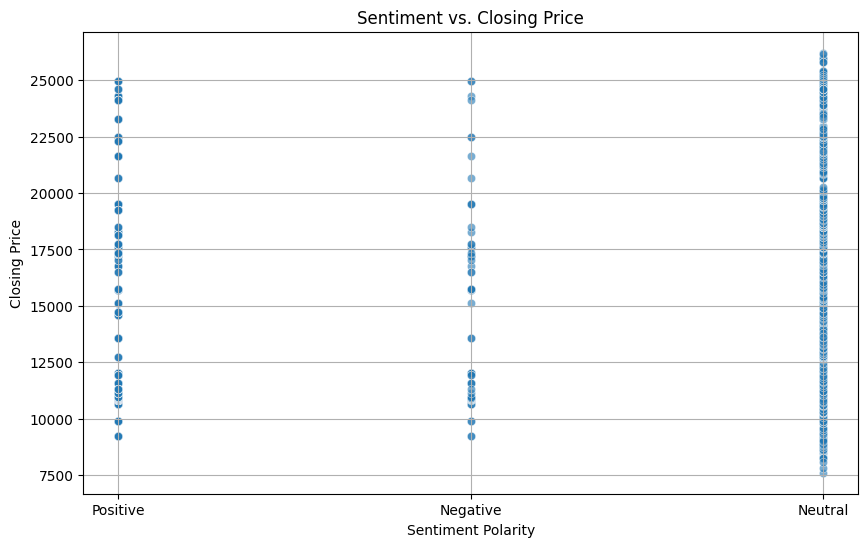

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='sentiment', y='close', alpha=0.6)
plt.title('Sentiment vs. Closing Price')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

In [ ]:
duplicates = merged_data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")
merged_data = merged_data.drop_duplicates()

Number of Duplicate Rows: 0


##Finding an outliers

In [ ]:
Q1_close = merged_data['close'].quantile(0.25)
Q3_close = merged_data['close'].quantile(0.75)
IQR_close = Q3_close - Q1_close


##Removing the outliers

In [ ]:
min_close_threshold = 10500

In [ ]:
merged_data = merged_data[
    (merged_data['close'] >= max(Q1_close - 1.5 * IQR_close, min_close_threshold)) &
    (merged_data['close'] <= Q3_close + 1.5 * IQR_close)
]


##Visulaize it again

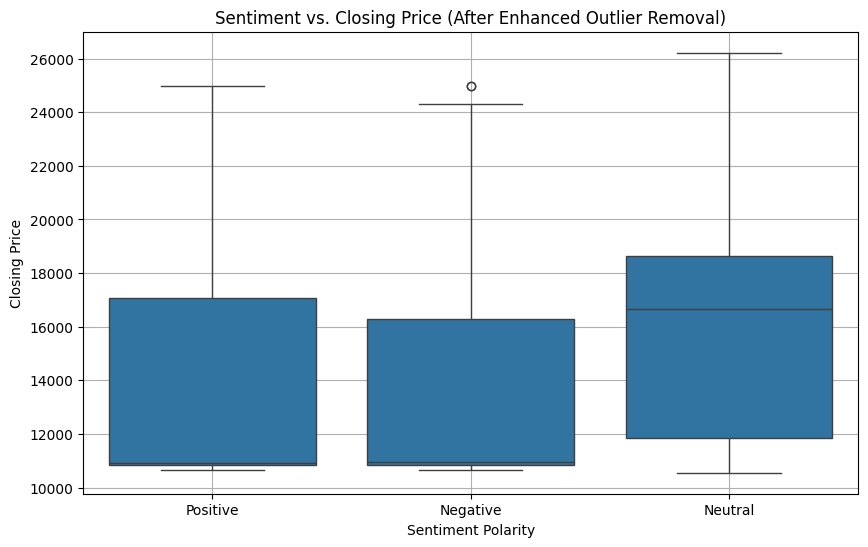

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='sentiment', y='close')
plt.title('Sentiment vs. Closing Price (After Enhanced Outlier Removal)')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Closing Price')
plt.grid()
plt.show()

In [ ]:
print("Negative or zero values in 'close':", (merged_data['close'] <= 0).sum())


Negative or zero values in 'close': 0


In [ ]:
missing_values = merged_data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
datetime                0
open                    0
high                    0
low                     0
close                   0
volume                  0
open interest           0
date_x                  0
title                1332
link                 1332
snippet              1332
date_range           1736
date_y               1332
usable_date          1332
sentiment               0
sentiment_encoded       0
dtype: int64


In [ ]:
print("Data Types of Each Column:")
print(merged_data.dtypes)


Data Types of Each Column:
datetime             datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
open interest                 int64
date_x                       object
title                        object
link                         object
snippet                      object
date_range                   object
date_y               datetime64[ns]
usable_date                  object
sentiment                    object
sentiment_encoded             int64
dtype: object


## Check for duplicates

In [ ]:
duplicates = merged_data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")
merged_data = merged_data.drop_duplicates()

Number of Duplicate Rows: 0


##Filling the missing value

# Fill missing 'title', 'link', and 'snippet' using mode

In [ ]:
merged_data['title'] = merged_data['title'].fillna(merged_data['title'].mode()[0])
merged_data['link'] = merged_data['link'].fillna(merged_data['link'].mode()[0])
merged_data['snippet'] = merged_data['snippet'].fillna('No snippet available')


## Fill date_y with usable date if missing

In [ ]:
merged_data['date_y'] = merged_data['date_y'].fillna(merged_data['usable_date'])

### Fill usable date using backfill/forward fill

In [ ]:
merged_data['usable_date'] = merged_data['usable_date'].fillna(method='bfill').fillna(method='ffill')

<ipython-input-35-c26dcad66d50>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['usable_date'] = merged_data['usable_date'].fillna(method='bfill').fillna(method='ffill')


### Final check for missing values

In [ ]:
print("Missing Values After Filling:")
print(merged_data.isnull().sum())


Missing Values After Filling:
datetime                0
open                    0
high                    0
low                     0
close                   0
volume                  0
open interest           0
date_x                  0
title                   0
link                    0
snippet                 0
date_range           1736
date_y               1332
usable_date             0
sentiment               0
sentiment_encoded       0
dtype: int64


## Fill missing values in date range with a logical fallback

In [ ]:
merged_data['date_range'] = merged_data['date_range'].fillna('No range available')

#### Replace missing date_y values with usable_date

In [ ]:
merged_data['date_y'] = merged_data['date_y'].fillna(merged_data['usable_date'])

###Verify missing values

In [ ]:
print("Missing Values After Fixing date_range and date_y:")
print(merged_data.isnull().sum())


Missing Values After Fixing date_range and date_y:
datetime             0
open                 0
high                 0
low                  0
close                0
volume               0
open interest        0
date_x               0
title                0
link                 0
snippet              0
date_range           0
date_y               0
usable_date          0
sentiment            0
sentiment_encoded    0
dtype: int64


#Feature engineering

In [ ]:
lags = [1, 5, 7, 14, 30, 60, 90, 120, 150, 180]
horizons = {'day_1': 1, 'day_5': 5, 'day_7': 7, 'day_14': 14, '31st_dec': 21,
            'jan_2025': 51, 'feb_2025': 82, 'mar_2025': 112, 'apr_2025': 143, 'may_2025': 173}

##lagged feature

In [ ]:
for lag in lags:
    merged_data[f'price_lag_{lag}'] = merged_data['close'].shift(lag)


## future target

In [ ]:
for key, offset in horizons.items():
    merged_data[f'future_price_{key}'] = merged_data['close'].shift(-offset)


In [ ]:
merged_data.dropna(inplace=True)

In [ ]:
merged_data.head()

,datetime,open,high,low,close,volume,open interest,date_x,title,link,...,future_price_day_1,future_price_day_5,future_price_day_7,future_price_day_14,future_price_31st_dec,future_price_jan_2025,future_price_feb_2025,future_price_mar_2025,future_price_apr_2025,future_price_may_2025
180,2019-01-16,10899.65,10928.15,10876.90,10890.3,0,0,2019-01-16,"Police | City of Delray Beach, FL",https://www.delraybeachfl.gov/government/city-...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
181,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,The richest 1% own 50% of stocks held by Ameri...,https://finance.yahoo.com/news/the-richest-1-o...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
182,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,Deloitte's Corporate Finance practices recogni...,https://www2.deloitte.com/sg/en/pages/about-de...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
183,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,"TACHYON HEARBEAT (YTESTQFTACHYON) Stock Price,...",https://finance.yahoo.com/quote/YTESTQFTACHYON/,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
184,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,Avantor Inc (AVTR) Stock Price & News - Google...,https://www.google.com/finance/quote/AVTR:NYSE...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95


In [ ]:
news_data = news_data.drop(columns=['link'], errors='ignore')
merged_data = merged_data.drop(columns=['link'], errors='ignore')


In [ ]:
merged_data.head()

,datetime,open,high,low,close,volume,open interest,date_x,title,snippet,...,future_price_day_1,future_price_day_5,future_price_day_7,future_price_day_14,future_price_31st_dec,future_price_jan_2025,future_price_feb_2025,future_price_mar_2025,future_price_apr_2025,future_price_may_2025
180,2019-01-16,10899.65,10928.15,10876.90,10890.3,0,0,2019-01-16,"Police | City of Delray Beach, FL",Finance · Fire Rescue · Human Resources · Info...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
181,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,The richest 1% own 50% of stocks held by Ameri...,The chart breaks down the growing wealth gap v...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
182,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,Deloitte's Corporate Finance practices recogni...,Deloitte's Corporate Finance practices recogni...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
183,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,"TACHYON HEARBEAT (YTESTQFTACHYON) Stock Price,...",Find the latest TACHYON HEARBEAT (YTESTQFTACHY...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95
184,2019-01-17,10920.85,10930.65,10844.65,10905.2,0,0,2019-01-17,Avantor Inc (AVTR) Stock Price & News - Google...,Get the latest Avantor Inc (AVTR) real-time qu...,...,10905.2,10905.2,10905.2,10905.2,10906.95,10831.5,10849.8,10661.55,10651.8,10830.95


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1749 entries, 180 to 2021
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   datetime               1749 non-null   datetime64[ns]
 1   open                   1749 non-null   float64       
 2   high                   1749 non-null   float64       
 3   low                    1749 non-null   float64       
 4   close                  1749 non-null   float64       
 5   volume                 1749 non-null   int64         
 6   open interest          1749 non-null   int64         
 7   date_x                 1749 non-null   object        
 8   title                  1749 non-null   object        
 9   snippet                1749 non-null   object        
 10  date_range             1749 non-null   object        
 11  date_y                 1749 non-null   datetime64[ns]
 12  usable_date            1749 non-null   object        
 13  sentim

#Model Training for Multiple Targets

In [ ]:
features = [col for col in merged_data.columns if 'price_lag' in col or 'sentiment_encoded' in col]
models = {}
results = {}

for target, offset in horizons.items():
    print(f"\nTraining model for {target}...")
    X = merged_data[features]
    y = merged_data[f'future_price_{target}']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    models[target] = model
    results[target] = {'MSE': mse, 'R2': r2}

    print(f"Target: {target}, MSE: {mse}, R2: {r2}")



Training model for day_1...
Target: day_1, MSE: 24226.26251775671, R2: 0.9982590662452949

Training model for day_5...
Target: day_5, MSE: 28772.552504502422, R2: 0.997928782684436

Training model for day_7...
Target: day_7, MSE: 34773.579097659116, R2: 0.9975107144525561

Training model for day_14...
Target: day_14, MSE: 26681.588998309693, R2: 0.9981097548058357

Training model for 31st_dec...
Target: 31st_dec, MSE: 40376.24630055961, R2: 0.9971663855198235

Training model for jan_2025...
Target: jan_2025, MSE: 41209.33641662101, R2: 0.9973054995779548

Training model for feb_2025...
Target: feb_2025, MSE: 67357.3926443971, R2: 0.9957749164754485

Training model for mar_2025...
Target: mar_2025, MSE: 57546.346915073096, R2: 0.9966907054628217

Training model for apr_2025...
Target: apr_2025, MSE: 76219.5497548318, R2: 0.9958175817998075

Training model for may_2025...
Target: may_2025, MSE: 92675.1086040356, R2: 0.9951466529059274


In [ ]:
def predict_specific_dates(current_data):
    """Predict future prices for specific dates using trained models."""
    if 'snippet' in current_data.columns:

        current_data['sentiment_encoded'] = label_encoder.transform(
            current_data['snippet'].apply(lambda x: classify_sentiment(x))
        )
    else:

        print("Warning: 'snippet' column is missing in the prediction data. Defaulting sentiment to 'Neutral'.")
        current_data['sentiment_encoded'] = label_encoder.transform(['Neutral'] * len(current_data))


    for lag in lags:
        current_data[f'price_lag_{lag}'] = current_data['close'].shift(lag)

    predictions = {}
    for target, model in models.items():
        predictions[target] = model.predict(current_data[features].tail(1))[0]

    return predictions



In [ ]:
latest_data = nifty_data.tail(1).copy()
future_predictions = predict_specific_dates(latest_data)



In [ ]:
print("Future Price Predictions:")
for date, price in future_predictions.items():
    print(f"{date}: {price:.2f}")

Future Price Predictions:
day_1: 17310.12
day_5: 17491.10
day_7: 17492.36
day_14: 17368.57
31st_dec: 17413.60
jan_2025: 17254.06
feb_2025: 17399.62
mar_2025: 17472.10
apr_2025: 17463.87
may_2025: 18168.52


In [ ]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(model, f)

## **LSTM**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define features and targets
features = [col for col in merged_data.columns if 'price_lag' in col or 'sentiment_encoded' in col]
targets = [col for col in merged_data.columns if 'future_price' in col]

# Normalize feature data
scaler = MinMaxScaler()
merged_data[features] = scaler.fit_transform(merged_data[features])

# Create sequences for LSTM
def create_sequences(data, feature_cols, target_cols, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[feature_cols].iloc[i:i+seq_length].values)
        y.append(data[target_cols].iloc[i+seq_length].values)  # Multi-day output
    return np.array(X), np.array(y)

# Prepare training and testing data
seq_length = 30  # Use past 30 days
X, y = create_sequences(merged_data, features, targets, seq_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build an improved Bidirectional LSTM Model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='relu'), input_shape=(seq_length, len(features))),
    LayerNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(128, return_sequences=True, activation='relu')),
    LayerNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(64, activation='relu')),
    LayerNormalization(),
    Dropout(0.3),

    Dense(50, activation='relu'),
    Dense(len(targets))  # Output layer: predicts multiple future days
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')

# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Calculate Metrics for Each Forecasting Horizon
print("\nModel Accuracy Metrics:")
for i, target in enumerate(targets):
    mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    mape = np.mean(np.abs((y_test[:, i] - y_pred[:, i]) / y_test[:, i])) * 100
    accuracy = 100 - mape  # Convert MAPE to accuracy percentage

    print(f"{target}: Accuracy={accuracy:.2f}%, MSE={mse:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}, MAPE={mape:.2f}%")

# Predict Future Prices for the Next Few Days
latest_data = merged_data.tail(seq_length)[features].values.reshape(1, seq_length, len(features))
future_prices = model.predict(latest_data)[0]

# Print Future Predictions
print("\nPredicted Future Prices:")
for target, price in zip(targets, future_prices):
    print(f"{target}: {price:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 25s 257ms/step - loss: 217582512.0000 - val_loss: 456309504.0000
Epoch 2/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 214444736.0000 - val_loss: 455794176.0000
Epoch 3/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 215247040.0000 - val_loss: 454826016.0000
Epoch 4/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 217077232.0000 - val_loss: 453250560.0000
Epoch 5/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 213471696.0000 - val_loss: 450897888.0000
Epoch 6/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 213236400.0000 - val_loss: 447649824.0000
Epoch 7/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 212253344.0000 - val_loss: 443387008.0000
Epoch 8/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 210227536.0000 - val_loss: 438054208.0000
Epoch 9/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 202189424.0000 - val_loss: 431404352.0000
Epoch 10/150
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 198236224.0000 - va

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define features and targets
features = [col for col in merged_data.columns if 'price_lag' in col or 'sentiment_encoded' in col]
targets = [col for col in merged_data.columns if 'future_price' in col]

# Normalize feature data
scaler = MinMaxScaler()
merged_data[features] = scaler.fit_transform(merged_data[features])

# Create sequences for LSTM
def create_sequences(data, feature_cols, target_cols, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[feature_cols].iloc[i:i+seq_length].values)
        y.append(data[target_cols].iloc[i+seq_length].values)  # Multi-day output
    return np.array(X), np.array(y)

# Prepare training and testing data
seq_length = 30  # Use past 30 days
X, y = create_sequences(merged_data, features, targets, seq_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build an improved LSTM Model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='relu'), input_shape=(seq_length, len(features))),
    Dropout(0.3),
    Bidirectional(LSTM(128, return_sequences=True, activation='relu')),
    Dropout(0.3),
    LSTM(64, return_sequences=True, activation='relu'),
    Dropout(0.3),
    LSTM(64, activation='relu'),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(len(targets))  # Output layer: predicts multiple future days
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')

# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Calculate Metrics for Each Forecasting Horizon
results = {}
for i, target in enumerate(targets):
    mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    mape = np.mean(np.abs((y_test[:, i] - y_pred[:, i]) / y_test[:, i])) * 100
    accuracy = 100 - mape  # Convert MAPE to accuracy percentage

    results[target] = {'MSE': mse, 'RMSE': rmse, 'R²': r2, 'MAPE': mape, 'Accuracy': accuracy}

# Print accuracy results
print("\nModel Accuracy Metrics:")
for target, metrics in results.items():
    print(f"{target}: Accuracy={metrics['Accuracy']:.2f}%, MSE={metrics['MSE']:.4f}, RMSE={metrics['RMSE']:.4f}, R²={metrics['R²']:.4f}, MAPE={metrics['MAPE']:.2f}%")

# Predict Future Prices for the Next Few Days
latest_data = merged_data.tail(seq_length)[features].values.reshape(1, seq_length, len(features))
future_prices = model.predict(latest_data)[0]

# Print Future Predictions
print("\nPredicted Future Prices:")
for target, price in zip(targets, future_prices):
    print(f"{target}: {price:.2f}")


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Define features and targets
features = [col for col in merged_data.columns if 'price_lag' in col or 'sentiment_encoded' in col]
targets = [col for col in merged_data.columns if 'future_price' in col]

# Normalize feature data
scaler = MinMaxScaler()
merged_data[features] = scaler.fit_transform(merged_data[features])

# Create sequences for LSTM
def create_sequences(data, feature_cols, target_cols, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[feature_cols].iloc[i:i+seq_length].values)
        y.append(data[target_cols].iloc[i+seq_length].values)  # Multi-day output
    return np.array(X), np.array(y)

# Prepare training and testing data
seq_length = 30  # Use past 30 days
X, y = create_sequences(merged_data, features, targets, seq_length)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build an improved LSTM Model
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, activation='relu'), input_shape=(seq_length, len(features))),
    Dropout(0.3),
    Bidirectional(LSTM(128, return_sequences=True, activation='relu')),
    Dropout(0.3),
    LSTM(64, return_sequences=True, activation='relu'),
    Dropout(0.3),
    LSTM(64, activation='relu'),
    Dropout(0.3),
    Dense(50, activation='relu'),
    Dense(len(targets))  # Output layer: predicts multiple future days
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='mse')

# Train model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)

# Calculate Metrics for Each Forecasting Horizon
results = {}
for i, target in enumerate(targets):
    mse = mean_squared_error(y_test[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test[:, i], y_pred[:, i])
    mape = np.mean(np.abs((y_test[:, i] - y_pred[:, i]) / y_test[:, i])) * 100
    accuracy = 100 - mape  # Accuracy in percentage

    results[target] = {'MSE': mse, 'RMSE': rmse, 'R²': r2, 'MAPE': mape, 'Accuracy': accuracy}

# Print accuracy results
print("\nModel Accuracy Metrics:")
for target, metrics in results.items():
    print(f"{target}: Accuracy={metrics['Accuracy']:.2f}%, MSE={metrics['MSE']:.4f}, RMSE={metrics['RMSE']:.4f}, R²={metrics['R²']:.4f}, MAPE={metrics['MAPE']:.2f}%")

# Predict Future Prices for the Next Few Days
latest_data = merged_data.tail(seq_length)[features].values.reshape(1, seq_length, len(features))
future_prices = model.predict(latest_data)[0]

# Print Future Predictions
print("\nPredicted Future Prices:")
for target, price in zip(targets, future_prices):
    print(f"{target}: {price:.2f}")


# **Hugging face transformers**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import torch
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
from transformers import AutoModel

# Define features and targets
features = [col for col in merged_data.columns if 'price_lag' in col or 'sentiment_encoded' in col]
targets = [col for col in merged_data.columns if 'future_price' in col]

# Normalize feature data
scaler = MinMaxScaler()
merged_data[features] = scaler.fit_transform(merged_data[features])

# Create sequences for Transformer
class StockDataset(Dataset):
    def __init__(self, data, feature_cols, target_cols, seq_length=30):
        self.data = data
        self.feature_cols = feature_cols
        self.target_cols = target_cols
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        X = self.data[self.feature_cols].iloc[idx:idx+self.seq_length].values
        y = self.data[self.target_cols].iloc[idx+self.seq_length].values
        return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

seq_length = 30
dataset = StockDataset(merged_data, features, targets, seq_length)
train_size = int(len(dataset) * 0.8)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define Transformer-based Model
class HuggingFaceTransformer(nn.Module):
    def __init__(self, input_dim, output_dim, embed_dim=768, model_name="facebook/opt-125m"):
        super(HuggingFaceTransformer, self).__init__()

        # Convert numerical input into 768-dimension embeddings
        self.embedding = nn.Linear(input_dim, embed_dim)

        # Load transformer model (designed for numerical data)
        self.transformer = AutoModel.from_pretrained(model_name)

        # Fully connected layer to map transformer output to target
        self.fc = nn.Linear(embed_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)  # Convert input to 768 dimensions
        x = x.permute(1, 0, 2)  # (seq_len, batch_size, embed_dim)
        x = self.transformer(inputs_embeds=x).last_hidden_state
        x = x[-1, :, :]  # Take last output
        x = self.fc(x)
        return x

# Initialize Model
model = HuggingFaceTransformer(input_dim=len(features), output_dim=len(targets))
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(50):
    model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        y_pred.append(outputs.numpy())
        y_true.append(y_batch.numpy())

y_pred = np.concatenate(y_pred, axis=0)
y_true = np.concatenate(y_true, axis=0)

# Calculate Metrics for Each Forecasting Horizon
print("\nModel Accuracy Metrics:")
for i, target in enumerate(targets):
    mse = mean_squared_error(y_true[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true[:, i], y_pred[:, i])
    mape = np.mean(np.abs((y_true[:, i] - y_pred[:, i]) / y_true[:, i])) * 100
    accuracy = 100 - mape  # Convert MAPE to accuracy percentage

    print(f"{target}: Accuracy={accuracy:.2f}%, MSE={mse:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}, MAPE={mape:.2f}%")

# Predict Future Prices for the Next Few Days
latest_data = merged_data.tail(seq_length)[features].values.reshape(1, seq_length, len(features))
future_prices = model(torch.tensor(latest_data, dtype=torch.float32)).detach().numpy()[0]

# Print Future Predictions
print("\nPredicted Future Prices:")
for target, price in zip(targets, future_prices):
    print(f"{target}: {price:.2f}")


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load Data (Replace with actual DataFrame)


# Define Features & Targets
features = [col for col in merged_data.columns if 'price_lag' in col or 'sentiment_encoded' in col]
targets = [col for col in merged_data.columns if 'future_price' in col]

# Normalize Features with StandardScaler (better than MinMaxScaler)
scaler = StandardScaler()
merged_data[features] = scaler.fit_transform(merged_data[features])

# Create Dataset Class
class StockDataset(Dataset):
    def __init__(self, data, feature_cols, target_cols, seq_length=30):
        self.data = data
        self.feature_cols = feature_cols
        self.target_cols = target_cols
        self.seq_length = seq_length

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        X = self.data[self.feature_cols].iloc[idx:idx+self.seq_length].values
        y = self.data[self.target_cols].iloc[idx+self.seq_length].values
        return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# Dataset & DataLoader
seq_length = 30
dataset = StockDataset(merged_data, features, targets, seq_length)

train_size = int(len(dataset) * 0.8)
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define Improved Transformer Model
class ImprovedTransformer(nn.Module):
    def __init__(self, input_dim, output_dim, embed_dim=256, num_heads=8, num_layers=3, dropout=0.2):
        super(ImprovedTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        encoder_layers = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, output_dim)
        self.dropout = nn.Dropout(dropout)  # Regularization

    def forward(self, x):
        x = self.embedding(x)  # Convert input to higher dimensions
        x = self.dropout(x)  # Apply dropout
        x = x.permute(1, 0, 2)  # (seq_len, batch_size, embed_dim)
        x = self.transformer(x)
        x = x[-1, :, :]  # Take last output
        return self.fc(x)

# Initialize Model
model = ImprovedTransformer(input_dim=len(features), output_dim=len(targets)).to(device)
criterion = nn.SmoothL1Loss()  # Better for time-series regression
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.7)  # Reduce LR every 5 epochs

# Training Loop
epochs = 20  # Increased epochs for better learning
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    scheduler.step()  # Adjust learning rate
    print(f"Epoch {epoch+1}/{epochs}, Avg Loss: {total_loss/len(train_loader):.4f}, LR: {scheduler.get_last_lr()[0]:.6f}")

# Evaluation
model.eval()
y_pred, y_true = [], []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        y_pred.append(outputs.cpu().numpy())
        y_true.append(y_batch.cpu().numpy())

y_pred = np.concatenate(y_pred, axis=0)
y_true = np.concatenate(y_true, axis=0)

# Model Performance Metrics
print("\nModel Accuracy Metrics:")
for i, target in enumerate(targets):
    mse = mean_squared_error(y_true[:, i], y_pred[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true[:, i], y_pred[:, i])
    mape = np.mean(np.abs((y_true[:, i] - y_pred[:, i]) / y_true[:, i])) * 100
    accuracy = 100 - mape  # Convert MAPE to accuracy percentage

    print(f"{target}: Accuracy={accuracy:.2f}%, MSE={mse:.4f}, RMSE={rmse:.4f}, R²={r2:.4f}, MAPE={mape:.2f}%")

# Predict Future Prices
latest_data = merged_data.tail(seq_length)[features].values.reshape(1, seq_length, len(features))
latest_data = torch.tensor(latest_data, dtype=torch.float32).to(device)

future_prices = model(latest_data).detach().cpu().numpy()[0]

# Print Future Predictions
print("\nPredicted Future Prices:")
for target, price in zip(targets, future_prices):
    print(f"{target}: {price:.2f}")


Using device: cuda


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1/20, Avg Loss: 15796.0479, LR: 0.001000
Epoch 2/20, Avg Loss: 15782.1476, LR: 0.001000
Epoch 3/20, Avg Loss: 15763.4470, LR: 0.001000
Epoch 4/20, Avg Loss: 15741.2628, LR: 0.001000
Epoch 5/20, Avg Loss: 15715.2170, LR: 0.000700
Epoch 6/20, Avg Loss: 15688.4553, LR: 0.000700
Epoch 7/20, Avg Loss: 15665.0312, LR: 0.000700
Epoch 8/20, Avg Loss: 15640.0009, LR: 0.000700
Epoch 9/20, Avg Loss: 15613.7671, LR: 0.000700
Epoch 10/20, Avg Loss: 15584.3475, LR: 0.000490
Epoch 11/20, Avg Loss: 15558.3292, LR: 0.000490
Epoch 12/20, Avg Loss: 15535.9516, LR: 0.000490
Epoch 13/20, Avg Loss: 15513.6685, LR: 0.000490
Epoch 14/20, Avg Loss: 15489.1178, LR: 0.000490
Epoch 15/20, Avg Loss: 15465.7200, LR: 0.000343
Epoch 16/20, Avg Loss: 15443.3574, LR: 0.000343
Epoch 17/20, Avg Loss: 15425.7650, LR: 0.000343
Epoch 18/20, Avg Loss: 15408.2014, LR: 0.000343
Epoch 19/20, Avg Loss: 15388.7557, LR: 0.000343
Epoch 20/20, Avg Loss: 15370.8570, LR: 0.000240

Model Accuracy Metrics:
future_price_day_1: Accu